<a href="https://colab.research.google.com/github/Marcjuax/Files/blob/main/Taller_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 8

### Datos del estudiante:

**Nombre:Juan Camilo Reales Crespo** 

**Código:202015555** 

**1)** Con una línea de código clone el repositorio 

[https://github.com/Dacastror/datos_para_ajustar.git](https://github.com/Dacastror/datos_para_ajustar.git)  

En la carpeta "*datos*" de este repositorio hay un archivo llamado "*población_mundial_por_año.txt*". En este archivo la primera columna corresponde al año y la segunda a la población mundial en ese año. Cargue los datos con Numpy de forma que en una variable tenga los años y en otra la población. Grafique los datos cargados, colocar los años en el eje horizontal. Usando máscaras aplicadas a los arreglos de Python, seleccione solamente las parejas de datos entre los años $1970$ hasta $2019$. Imprima en pantalla los datos seleccionados. 

Usando la función llamada "ajuste_lineal" creada en clase, encuentre los parámetros de la recta que mejor ajusta los datos seleccionados. Grafique estos datos junto con la recta encontrada. Use la función de la recta encontrada para predecir la población en el año $2025$ y en el año $2035$, asumiendo que la tendencia de este periodo de tiempo continuará. 


**Bono:** Seleccione las parejas de datos entre el año $700$ al $1900$ usando máscaras. Agregue las columnas necesarias a la matriz $\textbf{P}$ como se mencionó en clase para que pueda obtener los $6$ parámetros de un ajuste polinómico de grado $5$ usando la ecuación $\vec v^{*}=(\textbf P^{\intercal}\textbf{P})^{-1}\textbf P^{\intercal}\vec y$. Grafique el polinomio de ajuste con una línea continua y los datos representados con puntos. Use este polinomio para estimar la población de los años $1473$, $1564$, $1643$, $1831$ y $1879$.


In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

In [3]:
#Respuesta
! git clone https://github.com/Dacastror/datos_para_ajustar.git

Cloning into 'datos_para_ajustar'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 45 (delta 2), reused 44 (delta 1), pack-reused 0
Unpacking objects: 100% (45/45), done.


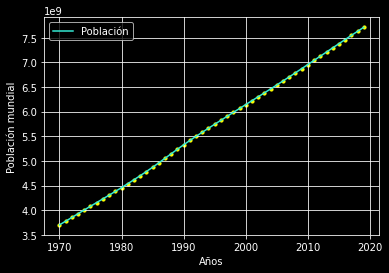

In [38]:
data = np.loadtxt("datos_para_ajustar/datos/población_mundial_por_año.txt")
población_mundial_de_ese_año = data[:,1].astype(int)
años = data[:,0].astype(int)
x, y = años, población_mundial_de_ese_año
mascara = x>=1970
plt.plot(x[mascara],y[mascara],label="Población",c ='#34ebd5')
plt.scatter(x[mascara],y[mascara],c="yellow",s=10)
plt.grid()
plt.legend()
plt.xlabel('Años')
plt.ylabel('Población mundial')
plt.show()

2790476.951912348 <built-in function bin>


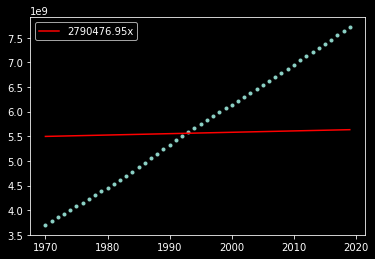

In [39]:
def ajuste_lineal(x,y):
  n = len(x)
  sumx = np.sum(x)
  sumy = np.sum(y)
  m = (np.sum(x*y) - sumx*sumy/n)/(np.sum(x*x)-sumx**2/n)
  b = sumy/n - sumx*m/n
  return m,bin

m,b = ajuste_lineal(x,y)
print(m,b)
plt.plot(x[mascara],y[mascara],'.')
b = 0
plt.plot(x[mascara],m*x[mascara]+b,'r',label=f"{np.round(m,2)}x")
plt.legend()
plt.show()


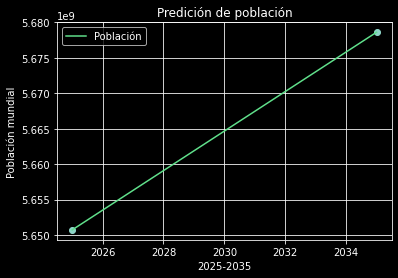

Predicción: En el 2025 la población será de aproximadamente 5650715925 habitantes y en el 2035 será de aproximadamente 5678620695 habitantes.


In [40]:
# Función de la recta: y = 2790476.95x
x1 = [2025,2035]
y1 = [x1[0]*2790477,x1[1]*2790477]
plt.plot(x1,y1,label="Población",c="#60e08b")
plt.title("Predición de población")
plt.scatter(x1,y1)
plt.grid()
plt.legend()
plt.xlabel("2025-2035")
plt.ylabel('Población mundial')
plt.show()

prediccion = "Predicción: En el 2025 la población será de aproximadamente "+str(2025*2790477)+" habitantes y en el 2035 será de aproximadamente "+str(2035*2790477)+" habitantes."
print(prediccion)

**2)** En la carpeta "*datos*" del repositorio que clonó en el punto $1$ se encuentran archivos nombrados con la palabra "*codigo*", guion bajo y un número. De acuerdo al último dígito de su código de estudiante seleccione el archivo con el que trabajará. Con este mismo dígito seleccione La función de ajuste que encuentra en la siguiente tabla: 

  \begin{array}{r|l} 
  \text{Dígito} & \text{Función de ajuste}\\ 
  \hline 
  0 & f(x) = ax^3 + bx^2 + cx + d\\ 
  1 & f(x) = a\exp{\left(\frac{-(x-b)^2}{c}\right)}+d\\ 
  2 & f(x) = \frac{a}{b+\exp(c-x)}+d\\ 
  3 & f(x) = \frac{a}{b+\exp(1-x)}\\ 
  4 & f(x) = a+b\cos(cx+d)\\ 
  5 & f(x) = \frac{a}{\pi((x-b)^2+a^2)}\\ 
  6 & f(x) = a + bx + c\exp\left(\frac{-(x-d)^2}{e}\right)\\ 
  7 & f(x) = a + b\sqrt{cx+d}\\ 
  8 & f(x) = ax^b\\ 
  9 & f(x) = \frac{-a}{a^2+(x-b)^2} \\ 
  \end{array} 

Cargue los datos con Numpy. Utilice la librería Scipy y función de ajuste que le correspondió para encontrar los parámetros de ajuste ($a$, $b$,...). Grafique los datos descargados como puntos sin unir con línea y el ajuste obtenido como una línea continua, ambos en una única gráfica, utilice colores diferentes para la línea de ajuste y los datos. En la carpeta llamada "*ejemplos_de_resultados_esperados*" Puede observar el resultado que se espera obtener. 
Imprimir en pantalla los valores de los coeficientes obtenidos. evalúe la función de ajuste obtenida en $x=2.4$ y $x=4.5$. Incluya estos puntos ($x$, $f(x)$) en la gráfica realizada anteriormente y asígneles un color diferente al color de la línea o el de los datos. 

In [64]:
#Respuesta
data2 = np.loadtxt("datos_para_ajustar/datos/codigo_5.dat")
#Función de ajuste : No.5
pi = np.pi
def f(x,a,b,c,pi):
  return a*(1/pi*(x-b)**2 + a**2)
x = data2.astype(float)
y = f(x,0.8,0.4,0.1,pi).astype(float)

coef, cov = curve_fit(f,x,y)
plt.plot(x,y,'.')
plt.plot(x,f(x, *coef),'r')
plt.sho()

print("Coeficientes de la función: "+ str(coef))
print("Covarianza de coeficientes: "+str(cov))

ValueError: ignored

error: ignored

**3)** **a)** Escriba una definición de Python que retorna el valor de $f(x) = a_1x^5 + a_2x^4 + a_3x^3 + a_4x^2 + a_5x + a_6$ teniendo como entrada un arreglo $x$ y los $6$ coeficientes $a_1$, $a_2$, $a_3$, $a_4$, $a_5$ y $a_6$. 

Haga uso de la definición creada anteriormente, evaluándola para $x$ igual a un arreglo de $100$ números entre $-10$ a $10$ separados de forma equidistante. los $6$ coeficientes a usar serán los $6$ últimos dígitos de su código de estudiante (el último dígito de su código se corresponde con $a_6$ y así sucesivamente). A cada resultado obtenido al evaluar la definición, sumele un número aleatorio diferente usando `10*np.random.randn(100)` (esto generará $100$ números aleatorios (uno para cada uno de sus números) con distribución gaussiana de varianza $10$ y media $0$), claramente, para todo lo anterior **No** necesita ningún tipo de ciclo de Python. Guarde en 2 columnas de un archivo los datos de $x$ y $f(x)$. Suba Este archivo a un nuevo proyecto en su cuenta de GitHub. 

In [86]:
#Respuesta

def funcion(x,a1,a2,a3,a4,a5,a6):
  return (a1*x**5)+(a2*x**4)+(a3*x**3)+(a4*x**2)+(a5*x) + a6

x = np.linspace(-10, 10, 100)
#Código: 202015555
a6, a5, a4, a3, a2, a1 = 5, 5, 5, 5, 1 , 0
f_x = funcion(x,a1,a2,a3,a4,a5,a6) + 10*np.random.randn(100)

data3 = np.array((x,f_x)).T
np.savetxt("file.dat",data3, fmt= " %i %10.5f ")


**b)** Usando código clone este repositorio de GitHub, lea los datos de su archivo y grafique los datos. Luego ajuste los datos a un polinomio de grado $5$ usando la librería Scipy. Grafique sus datos y sobre estos grafique el polinomio de ajuste. Evalúe el polinomio encontrado para $x=0$, $x=10$ y $x=15$. 

In [ ]:
#Respuesta
